In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/AB_NYC_2019/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Целевая переменная reviews_per_month 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

In [6]:
df.sort_values(by='reviews_per_month', 
        ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25


In [7]:
#среднее значение числа просмотров в месяц
rpw_Mean = df['reviews_per_month'].mean()

In [8]:
df['price'].mean()

152.7206871868289

In [9]:
df['minimum_nights'].mean()

7.029962163820431

In [10]:
df['availability_365'].mean()

112.78132733408324

In [11]:
df[df['reviews_per_month']<rpw_Mean].mean()

id                                1.613322e+07
host_id                           4.963208e+07
latitude                          4.072872e+01
longitude                        -7.395526e+01
price                             1.458266e+02
minimum_nights                    7.456929e+00
number_of_reviews                 1.139741e+01
reviews_per_month                 4.272440e-01
calculated_host_listings_count    5.015805e+00
availability_365                  9.594806e+01
dtype: float64

In [12]:
df[df['reviews_per_month']>=rpw_Mean].mean()

id                                2.182074e+07
host_id                           9.194878e+07
latitude                          4.072702e+01
longitude                        -7.394334e+01
price                             1.356620e+02
minimum_nights                    2.853968e+00
number_of_reviews                 6.325418e+01
reviews_per_month                 3.167742e+00
calculated_host_listings_count    5.446450e+00
availability_365                  1.508023e+02
dtype: float64

In [13]:
pd.crosstab(df['reviews_per_month']>=rpw_Mean, df['minimum_nights']>=7.029962163820431)
#housing with a large minimum size of armor and a large number of views is in the minority, 
#and Vice versa, with a small minimum armor and a small number of views is in the majority

minimum_nights,False,True
reviews_per_month,,
False,28491,6996
True,13071,337


In [14]:
pd.crosstab(df['reviews_per_month']>=rpw_Mean, df['price']>=152.7206871868289)
#expensive and frequently viewed housing is in the minority, 
#and cheap and rarely viewed housing is in the majority

price,False,True
reviews_per_month,,
False,24272,11215
True,9744,3664


In [15]:
pd.crosstab(df['reviews_per_month']>=rpw_Mean, df['availability_365']>=112.78132733408324)
#non-constantly available and rarely viewed housing-the majority. 
#But among the most frequently viewed housing-constantly available apartments are slightly more.

availability_365,False,True
reviews_per_month,,
False,24001,11486
True,6273,7135


In [16]:
columns_to_show = ['price', 'minimum_nights', 'availability_365']

df.groupby([df['reviews_per_month']>=rpw_Mean])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
#the dependence of the popularity of housing on the price is not significant
#the dependence of the popularity of housing on the minimum size of the reservation is the most obvious
#the dependence of housing popularity on affordability is not very noticeable

price                         minimum_nights  \
                         mean         std amin   amax           mean   
reviews_per_month                                                      
False              159.165948  269.069846    0  10000       8.607772   
True               135.661993  135.292302    0   7500       2.853968   

                                        availability_365                        
                         std amin  amax             mean         std amin amax  
reviews_per_month                                                               
False              23.537391    1  1250        98.415927  132.794192    0  365  
True                6.617647    1   365       150.802282  120.472478    0  365

In [17]:
df.pivot_table(['reviews_per_month', 'price', 'minimum_nights', 'availability_365'], 
['neighbourhood_group'], aggfunc='mean').head(10)
# more popular housing in Bronx, Queens, and Staten Island, less popular in Manhattan and Brooklyn
# housing in popular areas is on average cheaper than in unpopular ones
# housing in popular areas on average has a lower minimum reservation size than in unpopular areas
# housing in popular areas has, on average, greater year-round availability than in unpopular areas

,availability_365,minimum_nights,price,reviews_per_month
neighbourhood_group,,,,
Bronx,165.758937,4.560953,87.496792,1.837831
Brooklyn,100.232292,6.056556,124.383207,1.283212
Manhattan,111.979410,8.579151,196.875814,1.272131
Queens,144.451818,5.181433,99.517649,1.941200
Staten Island,199.678284,4.831099,114.812332,1.872580


In [18]:
df.pivot_table(['reviews_per_month', 'price', 'minimum_nights', 'availability_365'], 
['room_type'], aggfunc='mean').head(10)
#the popularity of housing does not significantly depend on the type 
#renting a house / apartment is more expensive than a room, a private room is slightly more expensive than a shared one
#The minimum rental period for a house / apartment is longer than a room,
#year-round availability of shared rooms is on average higher than that of apartments and individual rooms.

,availability_365,minimum_nights,price,reviews_per_month
room_type,,,,
Entire home/apt,111.920304,8.506907,211.794246,1.306578
Private room,111.203933,5.377900,89.780973,1.445209
Shared room,162.000862,6.475000,70.127586,1.471726


In [19]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' 

from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [20]:
df.shape

(48895, 16)

In [21]:
df.dropna()
df.shape

(48895, 16)

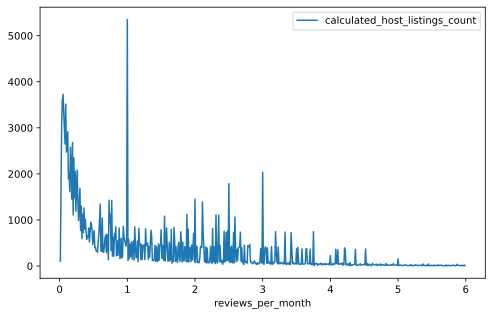

In [22]:
popularity_df = df[['calculated_host_listings_count'] + ['reviews_per_month']]
popularity_df = popularity_df[popularity_df['reviews_per_month']<6]
popularity_df.groupby('reviews_per_month').sum().plot()

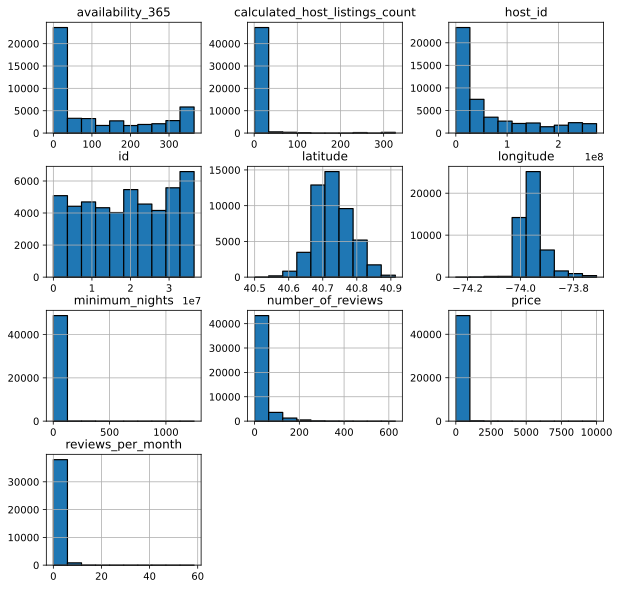

In [23]:
df.hist(edgecolor="black", linewidth=1.2, figsize=(10, 10))
plt.show()

In [25]:
plt.figure(figsize=(5, 5))
sns.pairplot(df, height=3, diag_kind="hist")
plt.show()

<Figure size 360x360 with 0 Axes>

MemoryError: 

<Figure size 2160x2160 with 110 Axes>